# Import files and libraries

In [1]:
from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
import sys


dir_path = os.getcwd().split(os.path.sep)
root_index = dir_path.index('Machine_Learning_project')
root_path = os.path.sep.join(dir_path[:root_index + 1])
sys.path.append(root_path + '/code/')
sys.path.append(root_path + '/code/data_loaders/')
sys.path.append(root_path + '/code/utils_keras')
sys.path.append(root_path + '/code/utils_sklearn')



In [10]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor, MLPClassifier
from itertools import product
import pandas as pd  
from sklearn.model_selection import train_test_split
import time


# Class for the Monks datasets
from data import *
from trainer import *

# Class for the Cup dataset
from data_cup import *
from Trainer_Cup import *
from Trainer_Regressor import *
from mee import *
from metrics import *


# Neural network with stochastic gradient descent

In this notebook we used the ***MLPClassifier*** from the scikit-learn library to train a multi-layer perceptron (MLP) neural network for classification on the Monk datasets (Monk 1, Monk 2, and Monk 3). The MLPClassifier is a class that implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

For each Monk dataset, the code is performing the following steps:

*   Loading the training and test data using the ***MonksDataset*** class;
*   One-hot encoding the categorical features using *pd.get_dummies()*;
*   Defining a dictionary of hyperparameters (mlp_hyperparam) for the MLPClassifier;
*   Creating an instance of the ***NeuralNetTrainer*** class, which is likely a custom class for training and evaluating the MLP model using the specified hyperparameters;
* Calling the *train()* method of the NeuralNetTrainer to perform a grid search over the specified hyperparameters and find the best model.
* Evaluating the accuracy of the best model on the test set using *accuracy_score()*.

The hyperparameters are varied across the different Monk datasets to find the best configuration for each problem. For example, for Monk 3, the *nesterovs_momentum* is set to True and the *learning_rate* is set to 'adaptive', which adjusts the learning rate based on the weights and gradients.



# MONK 1

In [4]:
m1_train = MonksDataset('monk1_train')
m1_test= MonksDataset('monk1_test')

In [5]:
X_dev, y_dev, X_test_m1, y_test_m1 = get_monks_data(m1_train, m1_test)

In [6]:
X_monk_dev_ohe_pd_cat = pd.get_dummies(X_dev, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
X_monk_test_ohe_pd_cat = pd.get_dummies(X_test_m1, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])

In [7]:
mlp = MLPClassifier(verbose = True)

In [8]:
mlp_hyperparam = {
    'solver': ['sgd'],
    'batch_size': [4, 8, 12],
    'nesterovs_momentum': [False],
    'early_stopping': [False],
    'momentum': [0.5, 0.6],
    'max_iter': [400],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.1, 0.2, 0.3],
    'activation': ['tanh'],
    'hidden_layer_sizes': [(4,)]
    }

In [ ]:
trainer = NeuralNetTrainer(
    model=MLPClassifier(verbose=True),
    param_distributions=mlp_hyperparam,
    X_dev=X_monk_dev_ohe_pd_cat,
    y_dev=y_dev,
    X_test=X_monk_test_ohe_pd_cat,
    y_test=y_test_m1,
    cv_splits=5,
    random_state=42
)

trainer.train(search_method='grid')

In [ ]:
y_pred_train = trainer.mlp_best.predict(X_monk_dev_ohe_pd_cat)

train_accuracy = accuracy_score(y_dev, y_pred_train)
print("Accuracy on training set:", train_accuracy)


y_pred_test = trainer.mlp_best.predict(X_monk_test_ohe_pd_cat)
test_accuracy = accuracy_score(y_test_m1, y_pred_test)
print("Accuracy on test set:", test_accuracy)

# MONK 2

In [13]:
m2_train = MonksDataset('monk2_train')
m2_test= MonksDataset('monk2_test')

In [14]:
X_dev_m2, y_dev_m2, X_test_m2, y_test_m2 = get_monks_data(m2_train, m2_test)

In [17]:
X_monk2_dev_ohe_pd_cat = pd.get_dummies(X_dev_m2, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
X_monk2_test_ohe_pd_cat = pd.get_dummies(X_test_m2, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])

In [15]:
mlp_hyperparam = {
    'solver': ['sgd'],
    'batch_size': [4, 8, 12],
    'nesterovs_momentum': [False],
    'early_stopping': [False],
    'momentum': [0.3, 0.4],
    'max_iter': [400],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.1, 0.2, 0.3],
    'activation': ['tanh'],
    'hidden_layer_sizes': [(3,), (4,)]
    }

In [ ]:
trainer = NeuralNetTrainer(
    model=MLPClassifier(verbose=True),
    param_distributions=mlp_hyperparam,
    X_dev=X_monk2_dev_ohe_pd_cat,
    y_dev=y_dev_m2,
    X_test=X_monk2_test_ohe_pd_cat,
    y_test=y_test_m2,
    cv_splits=5,
    random_state=42
)

trainer.train(search_method='grid')


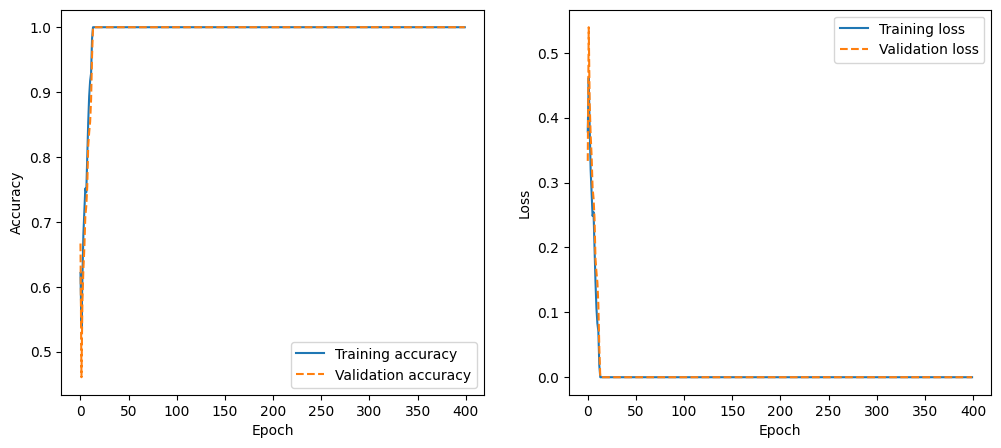

In [19]:
trainer.plot_training_curves()

In [ ]:
y_pred_train = trainer.mlp_best.predict(X_monk2_dev_ohe_pd_cat)
train_accuracy = accuracy_score(y_dev_m2, y_pred_train)
print("Accuracy on training set:", train_accuracy)

y_pred_test = trainer.mlp_best.predict(X_monk2_test_ohe_pd_cat)
test_accuracy = accuracy_score(y_test_m2, y_pred_test)
print("Accuracy on test set:", test_accuracy)

# MONK 3

In [21]:
m3_train = MonksDataset('monk3_train')
m3_test= MonksDataset('monk3_test')

In [22]:
X_dev_m3, y_dev_m3, X_test_m3, y_test_m3 = get_monks_data(m3_train, m3_test)

In [23]:
X_monk3_dev_ohe_pd_cat = pd.get_dummies(X_dev_m3, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
X_monk3_test_ohe_pd_cat = pd.get_dummies(X_test_m3, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])

In [24]:
mlp_hyperparam = {
    'solver': ['sgd'],
    'batch_size': ['auto'],
    'nesterovs_momentum': [True],
    'early_stopping': [False],
    'momentum': [0.5, 0.6],
    'max_iter': [400],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1, 0.2, 0.3],
    'activation': ['tanh'],
    'hidden_layer_sizes': [(3,), (4,)],
    'alpha': [0.5]
    }

In [ ]:
trainer = NeuralNetTrainer(
    model=MLPClassifier(verbose=True),
    param_distributions=mlp_hyperparam,
    X_dev=X_monk3_dev_ohe_pd_cat,
    y_dev=y_dev_m3,
    X_test=X_monk3_test_ohe_pd_cat,
    y_test=y_test_m3,
    cv_splits=5,
    random_state=42
)

trainer.train(search_method='grid')

In [ ]:
trainer.plot_training_curves()

In [ ]:
y_pred_train = trainer.mlp_best.predict(X_monk3_dev_ohe_pd_cat)
train_accuracy = accuracy_score(y_dev_m3, y_pred_train)
print("Accuracy on training set:", train_accuracy)

y_pred_test = trainer.mlp_best.predict(X_monk3_test_ohe_pd_cat)
test_accuracy = accuracy_score(y_test_m3, y_pred_test)
print("Accuracy on test set:", test_accuracy)

# CUP


In [4]:
cup = CupDataset('Cup_tr')
blind = CupDataset('Cup_ts')

blind = blind.data
df =cup.data


In [26]:
cup.split_data(test_size=0.1, random_state=0)

# X_dev and y_dev represent the features and labels of the development set (train/validation combined), X_final_test and y_final_test represent the features and labels of the final test set
X_dev,  X_final_test, y_dev, y_final_test = cup.get_splits()

# Further split the development set (X_dev, y_dev) into training and internal test sets
X_train, X_internal_test, y_train, y_internal_test = train_test_split(X_dev, y_dev, test_size=0.111, random_state=0)

# Extract the features from the 'blind' dataset 
X_blind = blind[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']]

In [ ]:
cup.split_data(test_size=0.1, random_state=0)

x_dev, x_test_final, y_dev, y_test_final = cup.get_splits()
x_train, x_test, y_train, y_test = train_test_split(x_dev, y_dev, test_size=0.111, random_state=0)
print(len(x_train))

x_train=x_train.values
x_test=x_test.values
Y_TR=y_train.values
Y_TS=y_test.values


from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
#-----------------------------------------
#---- DATA PREPROCESSING AND SPLIT TRAINING TEST
tin = time.time()
poly = PolynomialFeatures(2)
X_TR_poly = poly.fit_transform(x_train)
X_TS_poly = poly.transform(x_test)


X_TR=np.arctanh(X_TR_poly[:,1:])
X_TS=np.arctanh(X_TS_poly[:,1:])

#---------------------------------------------------


# Model Selection and Hyperparameters tuning
An initial broad grid search is typically performed to explore a wide array of hyperparameter values, aiming to pinpoint the most promising regions within the parameter space. Once these regions are identified, a subsequent, more detailed grid search is conducted to precisely optimize the hyperparameter settings.

 1)  A ***coarse grid search***,  was initially conducted, for the model selection using primarily to determine the optimal hyperparameters for the model architecture.
 2) A more ***fine grid search*** was performed to accurately identify the optimal learning hyperparameters.

The optimal configurations for final re-training and evaluation on the internal test set are those that achieve the lowest mean MEE during cross-validation on the validation set.

In [10]:
# Definition of function to estimate the metric MEE(Mean Euclidean Error)
def mean_euclidean_error(y_true, y_pred):
  euclidean_distance = np.linalg.norm(y_true - y_pred, axis = 1)
  mee = np.mean(euclidean_distance)
  return mee
  

### COARSE GRID SEARCH

In [11]:

# Define the sizes of the hidden layers
hidden_layer_sizes = [10, 50, 100, 150]

# Generate all combinations of 1, 2, and 3 hidden layers using Cartesian product
hidden_layer_combinations = [(size,) for size in hidden_layer_sizes] + \
                            [(size,size) for size in hidden_layer_sizes] + \
                            [(size,size,size) for size in hidden_layer_sizes]

mlp_hyperparam = {
    'solver': ['adam'],
    'batch_size': [16,64,128],
    'early_stopping': [False],
    'max_iter': [1],
    'learning_rate_init': [0.1,0.01,0.001],
    'beta_1': [0.9],
    'beta_2' : [0.999],
    'activation': ['tanh'],
    'alpha' : [0.01,0.001,0.0001],
    'hidden_layer_sizes': hidden_layer_combinations,
    'n_iter_no_change' : [400]
    }

In [20]:
# Definition of the model to use for the grid search, the grid search will be done on the architecture parameters using the cross validation on 5 and MEE as scorer

trainer = NeuralNetTrainer_cup(
    model=MLPRegressor(verbose=False),
    param_distributions=mlp_hyperparam,
    X_dev=X_TR,
    y_dev=Y_TR,
    X_test=X_TR,
    y_test=Y_TR,
    cv_splits=5,
    random_state=None
)

In [ ]:
result =pd.DataFrame( trainer._search_best_params(search_method='grid'))


In [ ]:
result.sort_values(by=['mean_test_score'], ascending=False,inplace=True) 
result = result[["param_"+ i for i in mlp_hyperparam.keys()]+["mean_test_score","std_test_score"]]
print(result)

### FINE RANDOM SEARCH

In [28]:
# Definition of the hyperparameters to search for the corase grid search

mlp_hyperparam = {
    'solver': ['adam'],
    'batch_size': [16],
    'early_stopping': [False],
    'max_iter': [10000],
    'learning_rate_init': np.linspace(0.00005,0.0004,100),
    'beta_1': np.linspace(0.1,0.9,100),
    'beta_2' : 1-np.logspace(-3.3,-0.17,300) ,
    'activation': ['tanh'],
    'alpha' : np.linspace(0.004,0.012,100),
    'hidden_layer_sizes': [(150,)],
    'n_iter_no_change' : [400]
    }

In [29]:
# Definition of the model to use for the random search, the random search will be done on the iperparameters using the cross validation on 10 and MEE as scorer

trainer = NeuralNetTrainer(
    model=MLPRegressor(verbose=False),
    param_distributions=mlp_hyperparam,
    X_dev=X_TR,
    y_dev=Y_TR,
    X_test=X_TR,
    y_test=Y_TR,
    cv_splits=5,
    random_state=None
)

In [ ]:
result = trainer._search_best_params(search_method='random',n_iter = 100)

In [ ]:
result.sort_values(by=['mean_test_score'], ascending=False,inplace=True) 
result = result[["param_"+ i for i in mlp_hyperparam.keys()]+["mean_test_score","std_test_score"]]
print(result)

## Model assessment
After identifying the optimal hyperparameter configuration using the two different grid searches, we proceed with training our model on the training/validation set. This approach allows us to fully utilize all available training/validation data. Early stopping is applied based on the training Mean Euclidean Error (MEE). At the end the model's learning curves are plotted and the model saved


#### Training best model

In [7]:
mlp_hyperparam = {
    'solver': 'adam',
    'batch_size': 16,
    'early_stopping': False,
    'max_iter': 10000,
    'learning_rate_init': 0.000121,
    'beta_1': 0.875758 ,
    'beta_2' :0.983082,
    'activation': 'tanh',
    'alpha' : 0.008768,
    'hidden_layer_sizes': (150,),
    'n_iter_no_change' : 400
    }


#### Learning curve


In [ ]:
mlp  = MLPRegressor(**mlp_hyperparam)
epochs = 1000
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    mlp.partial_fit(X_TR, Y_TR)  # Addestra il modello

    y_train_pred = mlp.predict(X_TR)  
    y_test_pred = mlp.predict(X_TS)   
    
    train_loss = MEE(Y_TR, y_train_pred)  
    test_loss = MEE(Y_TS, y_test_pred)    # Calcola l'errore di test
    
    train_loss_list.append(train_loss)  # Memorizza l'errore di addestramento
    test_loss_list.append(test_loss)    # Memorizza l'errore di test

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss_list, label='Training Error', linestyle=':')
plt.plot(range(epochs), test_loss_list, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Euclidean Error (MEE)')
plt.title('Training and Test Errors over All Epochs')
plt.legend()
plt.grid(True)

# Plot degli errori di addestramento e di test sulle ultime 100 epoche
plt.subplot(1, 2, 2)
plt.plot(range(epochs-100, epochs), train_loss_list[-100:], label='Training Error', linestyle=':')
plt.plot(range(epochs-100, epochs), test_loss_list[-100:], label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Euclidean Error (MEE)')
plt.title('Training and Test Errors over Last 100 Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Managing Performance Oscillations in Model Training
During neural network training, performance oscillations can occur due to the stochastic nature of optimization. To avoid selecting a model based on temporary performance spikes, an additional training phase over 100 epochs is implemented. In this phase, predictions on both training and test datasets are made, and the training loss is calculated and recorded for each epoch. By evaluating the performance over these 100 epochs, the model with the minimum training loss is identified. This approach ensures the final model is chosen based on consistent performance, reducing the risk of relying on random fluctuations. This stabilizes the model selection process, ensuring reliability and robustness.

In [33]:

def train(X_TR, Y_TR, X_TS, mlp_hyperparam, epoche):
    """
    Trains an MLP regressor with the given hyperparameters and returns the best predictions.
    
    Parameters:
    X_TR (array-like): Training data features
    Y_TR (array-like): Training data targets
    X_TS (array-like): Test data features
    mlp_hyperparam (dict): Dictionary of hyperparameters for the MLPRegressor
    epoche (int): Number of epochs for training
    
    Returns:
    tuple: Best predictions for the training data and test data
    """
    # Initialize the MLP regressor with the provided hyperparameters
    mlp = MLPRegressor(**mlp_hyperparam)
    
    # Initial training with the specified number of epochs
    epochs = epoche
    for epoch in range(epochs):
        mlp.partial_fit(X_TR, Y_TR)
    
    # Now we will train for 100 more epochs and track the performance
    epochs = 100
    train_loss_list = []
    y_train_list = []
    y_test_list = []

    for epoch in range(epochs):
        mlp.partial_fit(X_TR, Y_TR)  # Continue training
        y_test_pred = mlp.predict(X_TS)  # Predict on test data
        y_train_pred = mlp.predict(X_TR)  # Predict on training data

        # Calculate training loss using the MEE function
        train_loss = MEE(Y_TR, y_train_pred)
        train_loss_list.append(train_loss)  # Store the training loss
        y_train_list.append(y_train_pred)  # Store the training predictions
        y_test_list.append(y_test_pred)  # Store the test predictions
    
    # Find the index of the minimum training loss
    indice = np.argmin(train_loss_list)
    
    #Return the predictions corresponding to the minim
    return y_train_list[indice], y_test_list[indice]


#### AVERAGE OF PREDICTIONS

In this section, we conduct 5 trials of training and prediction with a neural network model. To ensure robustness, we select the best-performing model between two trained models per trial to avoid local minima. Finally, we compute the average predictions across trials for both training and test datasets, providing more stable results.

In [34]:
# Initializing an array to store the average predictions
# for each example in the test set
y_pred_mean = np.zeros((X_TS.shape[0], 3))

# Initializing an array to store the average predictions
# for each example in the training set
y_pred_train_mean = np.zeros((X_TR.shape[0], 3))

for i in range(5):
    # Training the model and obtaining predictions
    y_train_pred, y_test_pred = train(X_TR, Y_TR, X_TS, mlp_hyperparam, epoche=10000)
    y_train_pred_2, y_test_pred_2 = train(X_TR, Y_TR, X_TS, mlp_hyperparam, epoche=10000)
    
    # Comparing the training losses of the two trained models
    # and selecting the model with the lower loss
    if MEE(Y_TR, y_train_pred_2) < MEE(Y_TR, y_train_pred):
        y_train_pred = y_train_pred_2
        y_test_pred = y_test_pred_2
    
    # Adding the predictions of the current model to the array of average predictions
    y_pred_mean += y_test_pred
    y_pred_train_mean += y_train_pred

# Calculating the mean of the obtained average predictions
y_pred_mean /= 5
y_pred_train_mean /= 5

# Saving the average predictions to CSV files
np.savetxt("y_pred_test_VL_scikit.csv", y_pred_mean, delimiter=",")
np.savetxt("y_pred_train_VL_scikit.csv", y_pred_train_mean, delimiter=",")

## MODEL PREDICTION ON 

In [ ]:
df=pd.read_csv("ML-CUP23-TR.csv",comment="#")
y=df.iloc[:,-3:]
x=df.iloc[:,1:-3]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.111, random_state=0)
print(len(x_train))

x_train=x_train.values
x_test=x_test.values
Y_TR=y_train.values
Y_TS=y_test.values


from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
#-----------------------------------------
#---- DATA PREPROCESSING AND SPLIT TRAINING TEST
tin = time.time()
poly = PolynomialFeatures(2)
X_TR_poly = poly.fit_transform(x_train)
X_TS_poly = poly.transform(x_test)


X_TR=np.arctanh(X_TR_poly[:,1:])
X_TS=np.arctanh(X_TS_poly[:,1:])

#---------------------------------------------------